# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 and $k_1$ points on the side of class 1. Use the function you wrote in the previous assignment to plot this dataset!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

def plotLineAndPoints(l1, l2,*l3):
    l1_x1=[]
    l1_y1=[]
    l2_x2=[]
    l2_y2=[]
    x_ord = np.arange(-10,+10,1)
    y_ord=[]
    
    for i in l1:
        l1_x1.append(i[0])
        l1_y1.append(i[1])
    for i in l2:
        l2_x2.append(i[0])
        l2_y2.append(i[1])
    
        
    if l3!= ():
        a,b,c=l3[0]       
        y_ord = -((c/b)+(a/b)*x_ord)
    
        
    

    plt.plot(l1_x1,l1_y1,'r+',label="l1")
    plt.plot(l2_x2,l2_y2,"bo",label="l2")
    if len(l3)!=0:   
        
        plt.plot(x_ord,y_ord,color="green",linestyle="--",marker="o",label="l3")
        
    #print(x_ord)
    #print(y_ord)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.title("Plotting a line")
    plt.legend(loc="best",ncol=1)

a,b,c -2.9435505055179902 4.011214802151944 -3.6796565483447505
[[-2.22011257  4.19846581]
 [-2.94804527  3.05662687]
 [-2.37752445  2.13676676]
 [-3.13920482  3.32342863]
 [-3.82335624 -1.33074511]
 [-2.99920338  3.23795069]
 [-1.7394903   1.62473314]
 [ 1.53181883  2.14818298]
 [-4.84357569  3.61784294]
 [ 2.06971658  3.84308813]
 [-0.64442053 -3.45052071]
 [ 3.52497883 -4.70525315]
 [ 2.15758806 -1.42214923]
 [ 1.03219299 -2.05202384]
 [-2.2333607  -1.26282827]
 [-3.12866596 -3.03887173]
 [ 3.11100531  2.43357414]
 [-0.91336575 -0.81192298]
 [ 3.64552515  1.94211734]
 [ 0.12083753 -1.10580928]]


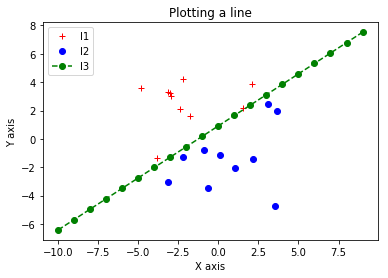

In [6]:
p = []
q = []
r = []

def generate_dataset(k1, k2):    
  """
  Your code for generating the dataset goes here! The output should X and y.
  You should call the visualization function from this function. Every time we 
  run this cell, it should plot a new dataset along with the line which was used
  to generate that dataset. We will test this by changing the values of k and
  running the cell multiple times
  """

  a,b,c = np.random.uniform(-5 , +5 , 3) # Coefficients of the line
  print("a,b,c",a,b,c)
  lst1 = []
  lst2 = []
  k1_count = 1
  k2_count = 1
  points = []
  while(k1_count <= k1):
    x = np.random.uniform(-5, +5,1)
    y = np.random.uniform(-5, +5,1)
    
    if a*x[0] + b*y[0] + c > 0:
        #print(x[0],y[0])
        temp = (x[0],y[0])
        temp1 = (x[0],y[0],1)
        points.append(temp1)
        lst1.append(temp)
        k1_count += 1
  while(k2_count <= k2):
    x = np.random.uniform(-5, +5,1)
    y = np.random.uniform(-5, +5,1)
    
    if a*x[0] + b*y[0] + c < 0:
        temp = (x[0],y[0])
        temp2 = (x[0],y[0],-1)
        points.append(temp2)
        lst2.append(temp)
        k2_count += 1
        
  global p
  p = lst1
  global q
  q = lst2
  global r
  r = (a,b,c)
  X = lst1 + lst2
  y = [1]*len(lst1) + [-1]*len(lst2)
  X = np.array(X)
  y = np.array(y)
  return(X,y)    
        
X,y = generate_dataset(10,10)
plotLineAndPoints(p,q,r)
print(X)          

### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 
1. Randomly choose a $w$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
3. Randomly choose a sample from the dataset and see if it is correctly classified. If yes,  move on to another sample.
4. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$ , where 
    *   $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
    *   $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
    *  $y$ is the class label for the sample under consideration
    * $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





The final weight vector w
[ 9.75789134 -4.47578774 -1.94424693]


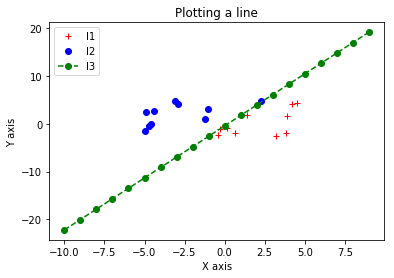

In [105]:
def fit(X,y):
    
    df = pd.DataFrame(data = X) 
    parameters = df.shape[-1]
    df["constant"] = 1
    df["lable"] = y
    col_names = [i for i in range(1,parameters+1)] + [0,"lable"]
    df.columns = col_names 
    #print(df)
    
    hypothesis = np.random.uniform(-20,20,parameters+1)
    while(True):
        count = 0
        #print("New Iteration Starting", hypothesis)
        output = []
        for i in df.values:
            temp = sum(i[:-1]*hypothesis)
            if temp > 0:
                outcome = 1
            else:
                outcome = -1
            if i[-1] == outcome:
                output.append(outcome)
                count+=1
            else:
                for j in range(len(hypothesis)):
                    hypothesis[j] = hypothesis[j] + i[-1]*i[j]
                #print("Updated",hypothesis)
        if count == df.shape[0]:
            break
    return(hypothesis)
    
    
        
hypothesis= fit(X,y)
print("The final weight vector w")
print(hypothesis)
plotLineAndPoints(p,q,hypothesis)

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

### Answer: 

Given : w(t + 1) = w(t) + y(t)x(t)

So the dot product with X(t) and w(t+1) gives : 

x(t) ⋅ w(t + 1) = x(t) ⋅ w(t) + x(t) ⋅ (y(t) x(t)) = x(t) ⋅ w(t) + y(t) (x(t) ⋅ x(t)))

In the above equation x(t).x(t) is dot product between the same vectors and its always greater than or equal to  zero. Also, the update is applied when the training set is misclassified.

Now three cases arise:

Case 1 : If the training set is correctly classified. No updation is done.

Case 2 : False Positive (prediction = 1 but real = -1) y(t) = -1 and dot product between the same vectors is always positive so the update will be W(t+1) = W(t)-negative number. we decrease W as we want to go below the threshold

Case 3 : False Negative (prediction = -1 but real = +1) y(t) = +1 as dot product between the same vectors is always positive so the update will be W(t+1) = W(t) + positive number. We increase W as we want to go above the threshold

This is how the algorithm work




### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

## Answer:

if the data is not linearly separable the data cannot be classified into different classes by simply drawing a line or plane throught the data. One method that can be applied is to transform the data using a non linear function and  the resulting points in the new plane are linearly separable

## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

In [35]:
def feature_normalization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
    df = pd.DataFrame(data = X)
    #n = X.shape[1]
    
    mu = df.mean()
    sigma = df.std(axis = 0)
    X_norm = (df-mu)/sigma
    return X_norm, mu, sigma


In [36]:
def cost_function(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
    
    #print("Theta", theta)
    df_X = pd.DataFrame(data = X)
    df_y = pd.DataFrame(data = y)
    df_theta = pd.DataFrame(data = theta)
    m = len(y)    
    loss = df_X.dot(df_theta) - df_y
    square = np.power(loss,2)
    cost = (square.values.sum())/m    
    
    

    return cost

In [38]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    J_history = np.zeros(num_iters)
    m = len(y)
    d_X = pd.DataFrame(X)
    d_y = pd.DataFrame(y)
    theta = pd.DataFrame(theta)
    for j in range(0,num_iters):
         
        temp = (d_X.dot(theta))-d_y
        d_x2=d_X.T
        gradient = (d_x2.dot(temp))*(2/(m))  ###13,506 Vs 506,1 
        theta = theta - (learning_rate*(gradient))
        J_history[j] = cost_function(X,y,theta)
    #print("J_history",J_history)  
    return(theta,J_history)


In [39]:
def linearRegression_ols(X, y):
    '''
    Implement the closed-form (or ordinary least squares) solution for
    linear regression. Save the result in the variable 'theta'.
    More information can be found at: 
      https://en.wikipedia.org/wiki/Ordinary_least_squares
    '''
    
    theta = np.zeros((X.shape[1], 1))
    
    temp = np.dot(np.transpose(X),X)
    temp1 = np.dot(np.linalg.inv(temp),np.transpose(X))
    theta = np.dot(temp1,y)
    

    return theta

In [44]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target


In [45]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization(X)
m = y.size
print(m)
X = np.c_[np.ones(m), X]  # Add a column of ones to X
print(X.shape)
df_X = pd.DataFrame(X)


Normalizing Features ...
506
(506, 14)


Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [49]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset
import time

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target


X = np.c_[np.ones(m), X] # Add intercept term to X

start_time_linearRegression = time.time()

theta = linearRegression_ols(X, y)

end_time_linearRegression = time.time()

print("Time taken for linear regression", end_time_linearRegression - start_time_linearRegression)
# Display normal equation's result
print('Theta computed from OLS linear regression : \n{}'.format(theta))

Time taken for linear regression 0.0003342628479003906
Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


Running gradient descent ...
Running gradient descent ...
Time taken for gradient descent is 0.9867370128631592
Theta computed from gradient descent : 
            0
0   22.532806
1   -0.881666
2    1.013139
3   -0.041264
4    0.708928
5   -1.990529
6    2.716641
7   -0.013314
8   -3.088635
9    2.188818
10  -1.557126
11  -2.039437
12   0.856297
13  -3.732068


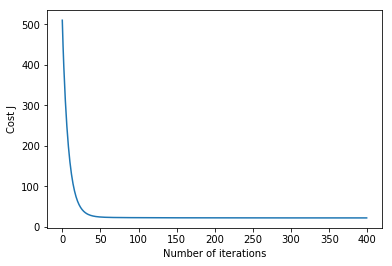

In [46]:
import time
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value

print('Running gradient descent ...')


alpha = 0.03
num_iters = 400
df_X = pd.DataFrame(data=X)
# Initialize theta and execute gradient descent
start_time_gradient_descent = time.time()
theta = np.zeros(df_X.shape[1])
theta, J_history = gradient_descent(X, y, theta, alpha,400)
end_time_gradient_descent = time.time()

print("Time taken for gradient descent is", end_time_gradient_descent-start_time_gradient_descent)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

In [17]:
def feature_normalization_regularization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
    df = pd.DataFrame(data = X)
    #n = X.shape[1]
    
    mu = df.mean()
    sigma = df.std(axis = 0)
    X_norm = (df-mu)/sigma

    return X_norm, mu, sigma

In [18]:
def cost_function_regularization(X, y, theta,lamda):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
    df_X = pd.DataFrame(data = X)
    df_y = pd.DataFrame(data = y)    
    df_theta = pd.DataFrame(data = theta)
    #print(df_theta.shape)
    m = len(y)
    loss = df_X.dot(df_theta) - df_y
    loss_square = np.power(loss,2)
    loss_square_sum = loss_square.values.sum()
    #print("your loss_square_sum",loss_square_sum)
    
    
    theta_square = np.power(theta,2)
    #print("your theta_square", theta_square)
    theta_square_sum = theta_square.values.sum()
    
    cost = (loss_square_sum + lamda*(theta_square_sum))/m
    #print("Your cost",cost)

    return cost

In [23]:
import time 

def gradient_descent_regularization(X, y, theta, learning_rate, num_iters,lamda):
    m = y.size
    J_history = np.zeros(num_iters)
    d_X = pd.DataFrame(X)
    d_y = pd.DataFrame(y)
    theta = pd.DataFrame(theta)

    for i in range(0, num_iters):
        
        '''
        Implement gradient descent for a single gradient step on the parameter 
        vector theta. Save the result of each iteration on J_history.
       '''
        #print("your theta",theta)
        J_history[i] = cost_function_regularization(X, y, theta,lamda)
        temp = (d_X.dot(theta))-d_y
        d_x2=d_X.T
        gradient = (d_x2.dot(temp))*(2/(m))
        ridge_theta = (2*lamda/m)*theta
        
        theta = theta - (learning_rate*(gradient+ridge_theta))


    return theta, J_history

In [20]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target

In [21]:
# Normalize features
print('Normalizing Features ...')
X, mu, sigma = feature_normalization_regularization(X)

X = np.c_[np.ones(m), X]  # Add a column of ones to X
print(X.shape)

Normalizing Features ...
(506, 14)


Running gradient descent ...
Time taken for Gradient Descent Regularization 1.2705457210540771
Theta computed from gradient descent : 
            0
0   22.096124
1   -0.832933
2    0.921726
3   -0.126988
4    0.721261
5   -1.779745
6    2.763379
7   -0.047961
8   -2.847775
9    1.871637
10  -1.319959
11  -1.978619
12   0.851929
13  -3.621975


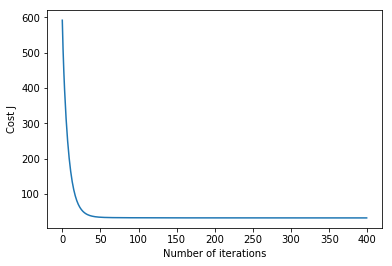

In [48]:
# Now we proceed with Gradient Descent
import time
print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400
lamda = 10 #change your lamda here

# Initialize theta and execute gradient descent
theta = np.zeros(df_X.shape[1])
start_time_GD_Regularization = time.time()
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters,lamda)
end_time_GD_Regularization = time.time()
time_taken_GD_Regularization =  end_time_GD_Regularization-start_time_GD_Regularization 
print("Time taken for Gradient Descent Regularization",time_taken_GD_Regularization)
# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))

### Gradient Descent Vs OLS 
Time taken Gradient Descent Regularization = 1.27 Sec

Time taken Linear Regression OLS method = 0.00033 Sec

In this case as the number of traning set is 1000 and small both the methods are equally quick. But if the number of training data increases. OLS method is not scalable because it involes a very computer intensive task of calculating inverse of a matrix. Which consumes much more time when you are implementing the algorithm and therefore Gradient Descent will be a better choice at that point

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$. In general, $$y=f(\mathbf{x})=\sum_{j} w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$ and $y_3=f_3(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

,X0,X1,X2,X3,X4,X5,Y-actual,Y-predicted
0,1.0,0.0,0.0,0.0,-1.0,-2.0,8.0,8.0
1,1.0,-0.0,-2.0,-1.0,0.0,-0.0,19.0,19.0
2,1.0,-1.0,-0.0,1.0,-3.0,0.0,1.0,-1.0
3,1.0,2.0,1.0,0.0,0.0,2.0,14.0,12.0
4,1.0,-0.0,-0.0,1.0,-0.0,1.0,11.0,12.0
5,1.0,-1.0,-1.0,1.0,-1.0,1.0,8.0,10.0
6,1.0,-0.0,-1.0,-0.0,0.0,1.0,18.0,16.0
7,1.0,2.0,1.0,-1.0,1.0,-1.0,14.0,16.0
8,1.0,-0.0,0.0,-1.0,-0.0,-1.0,8.0,12.0
9,1.0,0.0,0.0,-0.0,0.0,-1.0,12.0,12.0


Theta computed from OLS linear regression : 
[11.93831144  1.83343918 -3.65397571 -0.03278766  3.74052341 -0.01701995]
-----------------------------------------
The hypothesis is..
y_predicted = (11.938311443964762)(X0) + (1.8334391821238714)(X1) + (-3.653975713617886)(X2) + (-0.032787659481807105)(X3) + (3.7405234140359664)(X4) + (-0.01701994761048646)(X5) 
-----------------------------------------
Mean Square Error
Plot of Y-predicted vs Y-actual
2.980195679747282


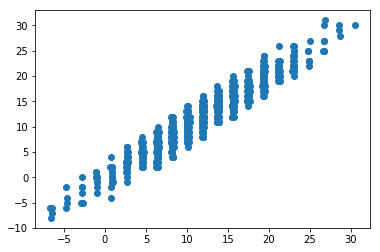

In [145]:
from IPython.display import display, HTML
data = pd.read_csv("data1.csv",header = None)
m = data.shape[0]
data = data.round(0)
#print(data)
X = data.iloc[:,0:5]
y = data.iloc[:,5]
X = np.c_[np.ones(m), X] # Add intercept term to X
theta = linearRegression_ols(X, y)
ypredicted = X.dot(theta)
#print(ypredicted)
X = pd.DataFrame(data = X)
X[6] = y
X[7] = ypredicted.round(0)
X.columns = ["X0","X1","X2","X3","X4","X5","Y-actual","Y-predicted"]
display(X)

#print(ypredicted)
#Display normal equation's result
plt.scatter(ypredicted,y)
print('Theta computed from OLS linear regression : \n{}'.format(theta))

print("-----------------------------------------")
print("The hypothesis is..")
print("y_predicted = ({a})(X0) + ({b})(X1) + ({c})(X2) + ({d})(X3) + ({e})(X4) + ({f})(X5) ".format(a = theta[0],b = theta[1], c = theta[2],d = theta [3],e = theta[4] ,f = theta[5]))

print("-----------------------------------------")

print("Mean Square Error")
print("Plot of Y-predicted vs Y-actual")
print(np.sum(np.square(ypredicted-y))/1000)

### Methodology and answer for function 2

In [146]:
import itertools
from itertools import product
from sklearn.linear_model import LinearRegression
data = pd.read_csv("data2.csv",header = None)
m = data.shape[0]
data = data.round(0)
lst = list(itertools.product([0,1,2,3], repeat=5))
# (0, 0, 1, 3, 0)
data_set = {}
for i in range(len(lst)):
    temp = lst[i]    
    if i not in data_set:
        data_set[i] = data[0]**temp[0] * data[1] ** temp[1] * data[2]**temp[2] * data[3]**temp[3] * data[4]**temp[4]
data_set = pd.DataFrame(data_set)
print(data_set.shape)
#X = np.c_[np.ones(m), data_set]
X = data_set
y = data.iloc[:,5]


linear_regression = LinearRegression(fit_intercept = False)
linear_regression.fit(X,y)
theta = pd.DataFrame(linear_regression.coef_)
#print("Theta shape")
#print(theta.shape)
#print(theta)
ypredicted = (X.dot(linear_regression.coef_)).round(0)


output = []
for i in lst:
    
    a,b,c,d,e = i
    temp = "(X1^{a})*(X2^{b})*(X3^{c})*(X4^{d})*(X5^{e})".format(a = a,b= b, c = c, d = d , e= e)
    output.append(temp)
    

X.columns = output
y = data.iloc[:,5]

X["y"] = y
X["y_predicted "] = ypredicted
display(X)
print("The weights of the equation are")
print(theta)
#print("y_predicted = ","+".join(output))   
print("Mean Square Error")
print(np.sum(np.square(ypredicted-y))/1000)

#plt.scatter(ypredicted,y)
         


(1000, 1024)


,(X1^0)*(X2^0)*(X3^0)*(X4^0)*(X5^0),(X1^0)*(X2^0)*(X3^0)*(X4^0)*(X5^1),(X1^0)*(X2^0)*(X3^0)*(X4^0)*(X5^2),(X1^0)*(X2^0)*(X3^0)*(X4^0)*(X5^3),(X1^0)*(X2^0)*(X3^0)*(X4^1)*(X5^0),(X1^0)*(X2^0)*(X3^0)*(X4^1)*(X5^1),(X1^0)*(X2^0)*(X3^0)*(X4^1)*(X5^2),(X1^0)*(X2^0)*(X3^0)*(X4^1)*(X5^3),(X1^0)*(X2^0)*(X3^0)*(X4^2)*(X5^0),(X1^0)*(X2^0)*(X3^0)*(X4^2)*(X5^1),...,(X1^3)*(X2^3)*(X3^3)*(X4^2)*(X5^0),(X1^3)*(X2^3)*(X3^3)*(X4^2)*(X5^1),(X1^3)*(X2^3)*(X3^3)*(X4^2)*(X5^2),(X1^3)*(X2^3)*(X3^3)*(X4^2)*(X5^3),(X1^3)*(X2^3)*(X3^3)*(X4^3)*(X5^0),(X1^3)*(X2^3)*(X3^3)*(X4^3)*(X5^1),(X1^3)*(X2^3)*(X3^3)*(X4^3)*(X5^2),(X1^3)*(X2^3)*(X3^3)*(X4^3)*(X5^3),y,y_predicted
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,83.0,71.0
1,1.0,1.0,1.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,45.0,44.0
2,1.0,-1.0,1.0,-1.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,35.0,36.0
3,1.0,0.0,0.0,0.0,-1.0,-0.0,-0.0,-0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,51.0,49.0
4,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,39.0,39.0
5,1.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,1.0,-0.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,42.0,42.0
6,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,72.0,78.0
7,1.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,1.0,-0.0,...,-216.0,0.0,-0.0,0.0,-216.0,0.0,-0.0,0.0,88.0,88.0
8,1.0,-2.0,4.0,-8.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,46.0,46.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,8.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,18.0,18.0


The weights of the equation are
                 0
0     4.156902e+01
1     4.181034e-01
2    -7.879302e-03
3    -1.194901e-01
4     2.500712e-01
5    -2.535605e+00
6    -7.904789e-01
7    -9.591405e-02
8    -1.873018e+00
9     7.825014e-01
10   -7.813874e-02
11   -2.247866e-01
12    5.720489e-01
13    4.271410e-01
14    1.088513e+00
15    4.909158e-01
16    1.214295e+00
17   -1.112362e+00
18   -5.989514e+00
19   -1.912962e+00
20   -3.976035e-01
21   -1.160941e+10
22    9.533602e+09
23    9.131085e+09
24   -1.320746e+00
25   -6.253459e+09
26    3.877843e+09
27    2.375616e+09
28    2.361210e+00
29    5.181269e+09
...            ...
994   5.559233e+08
995   1.159607e+09
996  -4.204485e+09
997  -3.641792e+09
998  -1.118318e+09
999  -1.298763e+09
1000  7.282620e+09
1001  5.828220e+08
1002 -7.571709e+09
1003 -8.264213e+08
1004  9.806485e+08
1005  4.933209e+09
1006 -1.596449e+09
1007  4.588980e+08
1008 -6.785052e+09
1009  3.369293e+09
1010  6.130970e+09
1011 -5.090079e+09
1012  4.367268e+09